## Code for elements of causal inference



In [97]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as npr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale

#### Code Snippet 3.3 (p35)

$$
\begin{align}
C &:= N_C \\
E &:= 4\cdot C + N_E
\end{align}
$$

with $N_C,N_E \sim \mathsf{N}(0,1)$ and graph $C\to E$

Pearson Correlation Coefficient = -0.0128 (pvalue = 0.826)


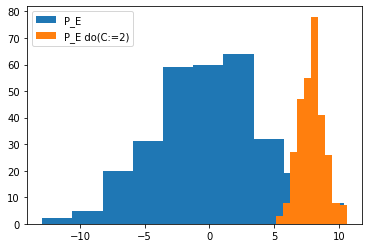

In [30]:
npr.seed(0)
n = 300

# Observational distribution
C = npr.normal(0,1,n)
E = 4*C + npr.normal(0,1,n)
plt.hist(E,label='P_E')

# Interventional distribution do(C:=2)
C = 2*np.ones(n)
E = 4*C + npr.normal(0,1,n)
plt.hist(E,label='P_E do(C:=2)')
plt.legend()

# Interventional distribution do(E:=\tilde{EN})
# breaks dependence between C and E
C = npr.normal(0,1,n)
E = npr.normal(0,1,n)
r,pvalue = stats.pearsonr(C,E)
print(f'Pearson Correlation Coefficient = {r:.3} (pvalue = {pvalue:.3})')

#### Code Snippet 6.43 (p117)

Graph where direct path is $X \to D \to Y$. Both $\{K\}$ and $\{F,C,K\}$ are valid adjustment set.

In [56]:
npr.seed(0)
n = 1000

C = npr.normal(0,1,n)
A = 0.8*npr.normal(0,1,n)
K = A + 0.1*npr.normal(0,1,n)
X = C - 2*A + 0.2*npr.normal(0,1,n)
F = 3*X + 0.8*npr.normal(0,1,n)
D = -2*X + 0.5*npr.normal(0,1,n)
G = D + 0.5*npr.normal(0,1,n)
Y = 2*K - D + 0.2*npr.normal(0,1,n)
H = 0.5*Y + 0.1*npr.normal(0,1,n)

reg = LinearRegression().fit(X.reshape(-1,1),Y)
print(f"Y~X        X's coeff: {reg.coef_[0]:.4} Intercept: {reg.intercept_}")

reg = LinearRegression().fit(np.hstack(list(v.reshape(-1,1) for v in (X,K))),Y)
print(f"Y~X+K      X's coeff: {reg.coef_[0]:.4} Intercept: {reg.intercept_}")

reg = LinearRegression().fit(np.hstack(list(v.reshape(-1,1) for v in (X,F,C,K))),Y)
print(f"Y~X+F+C+K  X's coeff: {reg.coef_[0]:.4} Intercept: {reg.intercept_}")

Y~X        X's coeff: 1.303 Intercept: -0.034443159127696854
Y~X+K      X's coeff: 1.972 Intercept: 0.0018953313235745561
Y~X+F+C+K  X's coeff: 1.973 Intercept: 0.001976143099566091


## Linear Gaussian Setup

1. simulation 
2. estimate causal effect
3. probabilistic counterfactuals 

In [112]:
a = 0
b = -1  # Z->Y negatively correlated 
c = 0
d = 1   # Z->X has small effect
e = 10  # Y->X has large effect

A = np.array([
    [0,0,0],
    [b,0,0],
    [d,e,0]
])

A, np.linalg.inv(np.eye(3)-A)

(array([[ 0,  0,  0],
        [-1,  0,  0],
        [ 1, 10,  0]]),
 array([[ 1.,  0.,  0.],
        [-1.,  1., -0.],
        [-9., 10.,  1.]]))

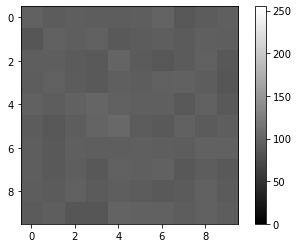

i=0: Z=1.76 Y=-1.38 mean(im)=93


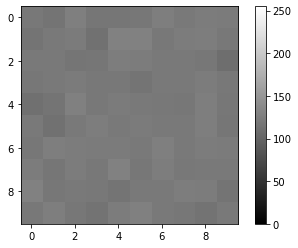

i=1: Z=0.40 Y=-0.43 mean(im)=121


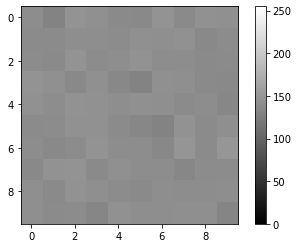

i=2: Z=0.98 Y=0.12 mean(im)=141


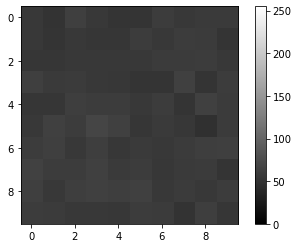

i=3: Z=2.24 Y=-2.48 mean(im)=58


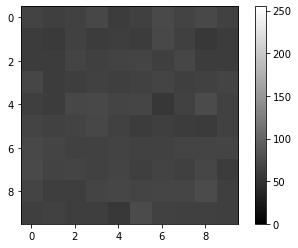

i=4: Z=1.87 Y=-2.22 mean(im)=66


In [124]:
npr.seed(0)
p = 10*10
n = 500

# Observational distribution
Z = npr.normal(0,1,n)
Y = a + b*Z + npr.normal(0,1,n)
X = (c + d*Z + e*Y).reshape(-1,1)*np.ones((1,p)) + npr.multivariate_normal(np.zeros(p),np.eye(p),n)

# Visualize 
I = [0,1,2,3,4]
X_rescale = minmax_scale(X,feature_range=(0,255))
for i in I:
    im = X_rescale[i,:].reshape(10,10)
    plt.imshow(im,cmap='gray',vmin=0, vmax=255)
    plt.colorbar()
    plt.show()
    print(f'i={i}: Z={Z[i]:.2f} Y={Y[i]:.2f} mean(im)={np.mean(im):.0f}')


In [131]:
# Max likelihood by linear regression
reg = LinearRegression().fit(Z.reshape(-1,1),Y)
print(f"Y~Z        Z's coeff: {reg.coef_[0]:.2f} (b={b}) Intercept: {reg.intercept_:.2f} (a={a})")

# Max likelihood by considering joint distribution


Y~Z        Z's coeff: -1.04 (b=-1) Intercept: -0.07 (a=0)


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [133]:
covariates = np.hstack(list(v.reshape(-1,1)*np.ones((1,p)) for v in (Z,Y)))
covariates.shape

(500, 200)

In [66]:
(c*np.ones((1,p))).shape

(1, 40)